In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scraping import Dbase
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
data = Dbase()
df1 = data.imdb_requests()

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         250 non-null    object 
 1   genre1         250 non-null    object 
 2   genre2         250 non-null    object 
 3   genre3         250 non-null    object 
 4   nb_genres      250 non-null    int64  
 5   released_year  250 non-null    int64  
 6   director1      250 non-null    object 
 7   director2      250 non-null    object 
 8   director3      250 non-null    object 
 9   nb_directors   250 non-null    int64  
 10  grade          250 non-null    float64
 11  votes          250 non-null    int64  
 12  gross(M$)      250 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 25.5+ KB


# Objectif : Prédiction de la note

In [4]:
#!pip install pandas_profiling


In [5]:
df1

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
0,Les Évadés,Drama,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,Frank Darabont,1,9.3,2386567,28.34
1,Le parrain,Crime,Drama,Drama,2,1972,Francis Ford Coppola,Francis Ford Coppola,Francis Ford Coppola,1,9.2,1654026,134.97
2,The Dark Knight : Le Chevalier noir,Action,Crime,Drama,3,2008,Christopher Nolan,Christopher Nolan,Christopher Nolan,1,9.0,2349686,534.86
3,"Le parrain, 2ème partie",Crime,Drama,Drama,2,1974,Francis Ford Coppola,Francis Ford Coppola,Francis Ford Coppola,1,9.0,1150571,57.30
4,12 Hommes en colère,Crime,Drama,Drama,2,1957,Sidney Lumet,Sidney Lumet,Sidney Lumet,1,9.0,704467,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,Comedy,Drama,Drama,2,1939,Frank Capra,Frank Capra,Frank Capra,1,8.1,108510,9.60
246,Autant en emporte le vent,Drama,History,Romance,3,1939,Victor Fleming,George Cukor,Sam Wood,3,8.1,294132,198.68
247,New York - Miami,Comedy,Romance,Romance,2,1934,Frank Capra,Frank Capra,Frank Capra,1,8.1,95811,4.36
248,La passion de Jeanne d'Arc,Biography,Drama,History,3,1928,Carl Theodor Dreyer,Carl Theodor Dreyer,Carl Theodor Dreyer,1,8.1,49023,0.02


## Observation

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1.sample(n=250))
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 257.48it/s]


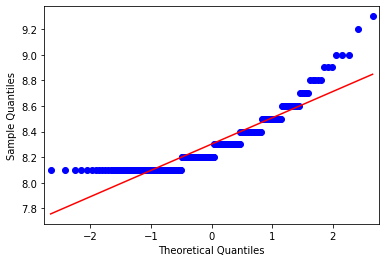

In [7]:
import statsmodels.api as sm

sm.qqplot(df1['grade'], line = 'r')
plt.show()

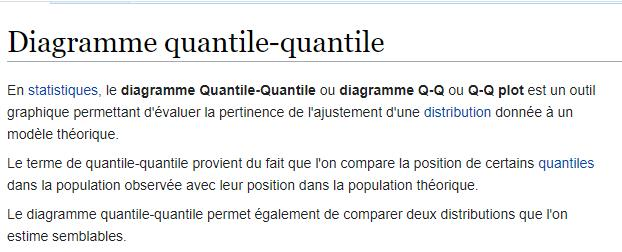

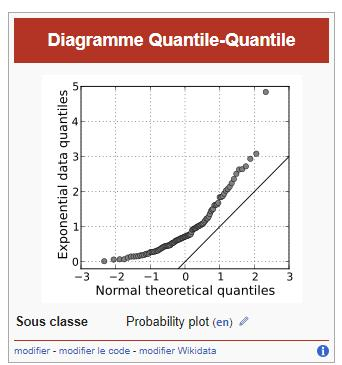

## Numerical variables

In [8]:
df2 = pd.DataFrame()
df2['pearson'] = abs(df1.corr(method = 'pearson'))['grade']

In [9]:
df2['spearman'] = abs(df1.corr(method = 'spearman'))['grade']

In [10]:
df2['kendall'] = abs(df1.corr(method = 'kendall'))['grade']

In [11]:
df2

,pearson,spearman,kendall
nb_genres,0.087858,0.052780,0.044888
released_year,0.000224,0.051686,0.037179
nb_directors,0.055489,0.046807,0.041310
grade,1.000000,1.000000,1.000000
votes,0.613237,0.403861,0.299205
gross(M$),0.199977,0.122683,0.088657


* **Par rapport au model prédictif, Seul 'votes' bénéficie d'une corrélation intéressante**

## Categorial variables

In [12]:
df_cat = df1[['genre1','director1']]
df_cat
        

,genre1,director1
0,Drama,Frank Darabont
1,Crime,Francis Ford Coppola
2,Action,Christopher Nolan
3,Crime,Francis Ford Coppola
4,Crime,Sidney Lumet
...,...,...
245,Comedy,Frank Capra
246,Drama,Victor Fleming
247,Comedy,Frank Capra
248,Biography,Carl Theodor Dreyer


In [13]:
#df_cat2 = pd.DataFrame(df1, columns = ['genre1', 'director1'])
#df_cat2

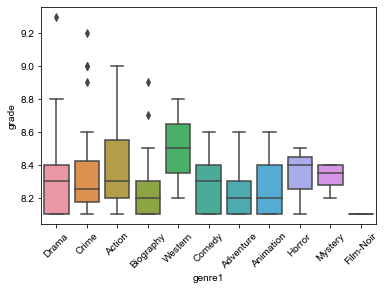

In [14]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="genre1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

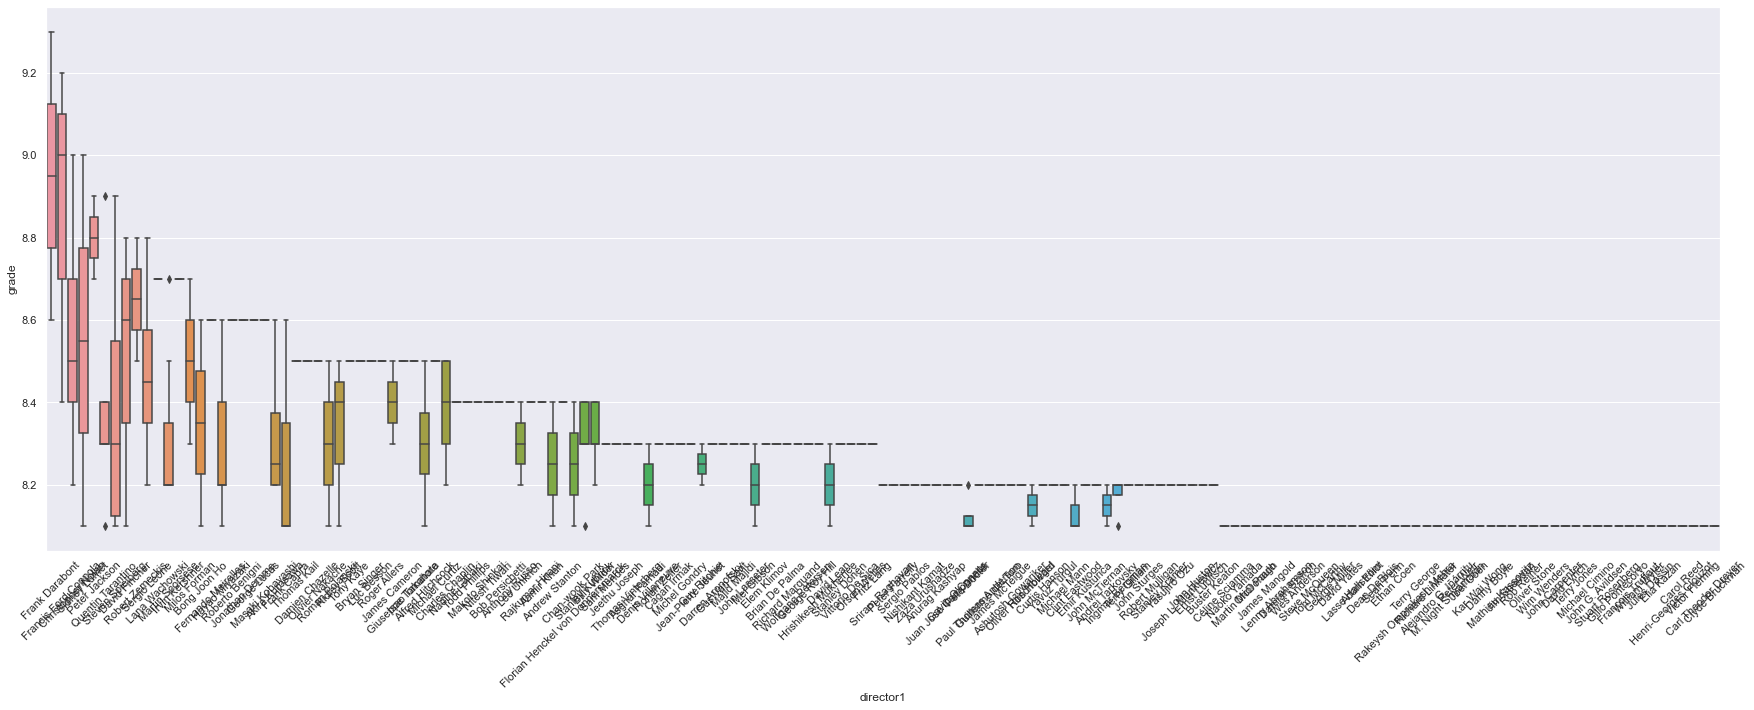

In [15]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="director1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

In [16]:
df1['director1'].value_counts()

Stanley Kubrick         7
Martin Scorsese         7
Christopher Nolan       7
Akira Kurosawa          6
Alfred Hitchcock        6
                       ..
Roger Allers            1
Juan José Campanella    1
Clyde Bruckman          1
Asghar Farhadi          1
Paul Thomas Anderson    1
Name: director1, Length: 157, dtype: int64

In [17]:
df1['director1'].nunique()

157

In [18]:
df4 = df1.head(25)

<AxesSubplot:xlabel='director1', ylabel='grade'>

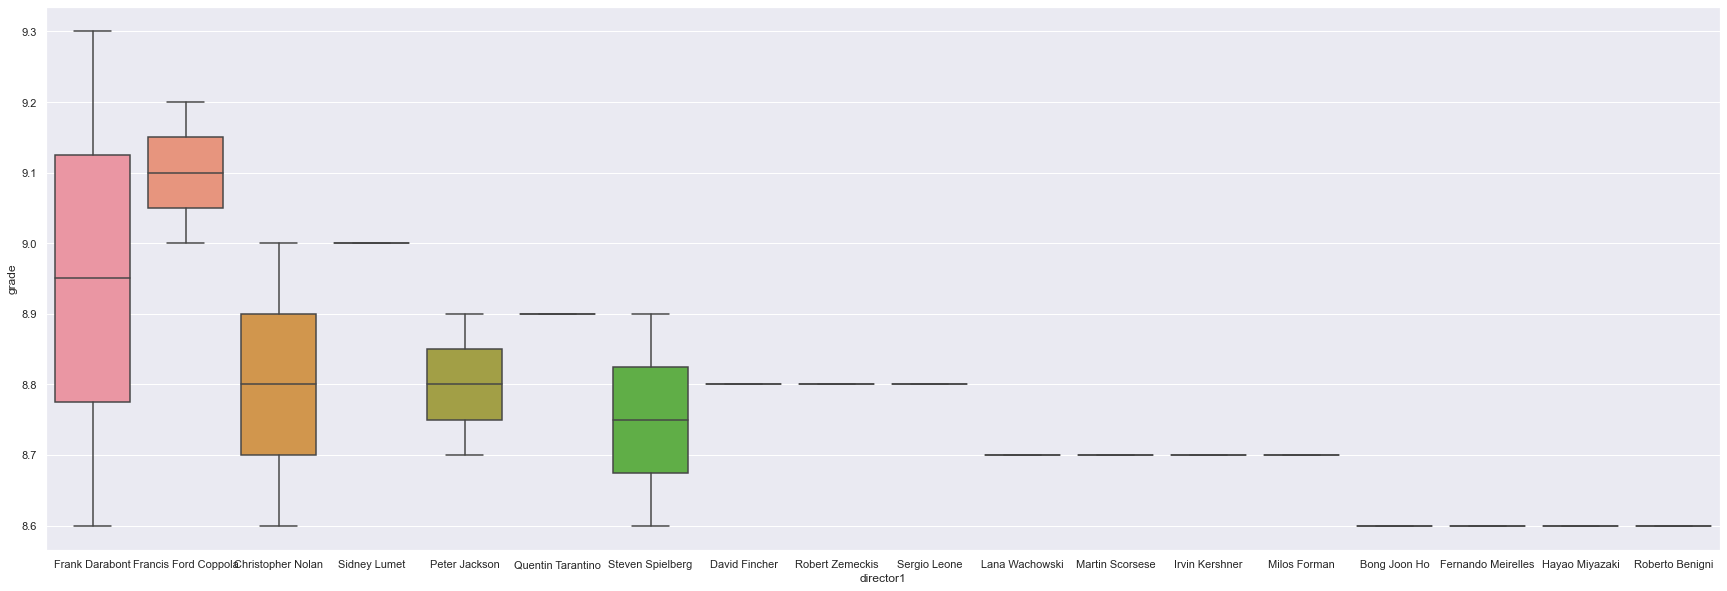

In [19]:
sns.boxplot(x="director1", y="grade", data=df4)

In [20]:
df1[df1['director1']=='Frank Darabont']

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
0,Les Évadés,Drama,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,Frank Darabont,1,9.3,2386567,28.34
23,La ligne verte,Crime,Drama,Fantasy,3,1999,Frank Darabont,Frank Darabont,Frank Darabont,1,8.6,1170744,136.80


In [21]:
df5 = df1[:100].copy()


In [22]:
df6 = pd.get_dummies(data=df5, columns=['director1','genre1'])

In [23]:
df6

,titles,genre2,genre3,nb_genres,released_year,director2,director3,nb_directors,grade,votes,...,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Western
0,Les Évadés,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,1,9.3,2386567,...,0,0,0,0,0,0,1,0,0,0
1,Le parrain,Drama,Drama,2,1972,Francis Ford Coppola,Francis Ford Coppola,1,9.2,1654026,...,0,0,0,0,0,1,0,0,0,0
2,The Dark Knight : Le Chevalier noir,Crime,Drama,3,2008,Christopher Nolan,Christopher Nolan,1,9.0,2349686,...,1,0,0,0,0,0,0,0,0,0
3,"Le parrain, 2ème partie",Drama,Drama,2,1974,Francis Ford Coppola,Francis Ford Coppola,1,9.0,1150571,...,0,0,0,0,0,1,0,0,0,0
4,12 Hommes en colère,Drama,Drama,2,1957,Sidney Lumet,Sidney Lumet,1,9.0,704467,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Toy Story,Adventure,Comedy,3,1995,John Lasseter,John Lasseter,1,8.3,902723,...,0,0,1,0,0,0,0,0,0,0
96,Braveheart,Drama,History,3,1995,Mel Gibson,Mel Gibson,1,8.3,971484,...,0,0,0,1,0,0,0,0,0,0
97,Reservoir Dogs,Drama,Thriller,3,1992,Quentin Tarantino,Quentin Tarantino,1,8.3,933750,...,0,0,0,0,0,1,0,0,0,0
98,Full Metal Jacket,War,War,2,1987,Stanley Kubrick,Stanley Kubrick,1,8.3,685061,...,0,0,0,0,0,0,1,0,0,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MinMaxScaler()
keepCols = ['votes']
scaled_df = scaler.fit_transform(df6[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)

scaled_df

,votes
0,1.000000
1,0.688494
2,0.984317
3,0.474405
4,0.284703
...,...
95,0.369010
96,0.398250
97,0.382204
98,0.276451


In [25]:
df6['votes'] = scaled_df

# NECESSITE DE SCALER LES DONNES NUMERIQUES

In [26]:
#importer les données Advertising.csv
list_var = df6.drop(['titles','genre2','genre3','nb_genres','released_year','director2','director3','nb_directors','grade','gross(M$)'],axis = 1)
list_var                    
                     
                     

,votes,director1_Aamir Khan,director1_Akira Kurosawa,director1_Alfred Hitchcock,director1_Andrew Stanton,director1_Anthony Russo,director1_Asghar Farhadi,director1_Billy Wilder,director1_Bob Persichetti,director1_Bong Joon Ho,...,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Western
0,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.688494,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.984317,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.474405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.284703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.369010,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96,0.398250,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,0.382204,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
98,0.276451,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg=LinearRegression()

y=df6['grade']
X=list_var

modeleReg.fit(X,y)

LinearRegression()

In [28]:
print(f'La constante est égale à : {modeleReg.intercept_}')
print(f'Les coefficients directeurs sont respectivement de : {modeleReg.coef_}')

#calcul du R²
Rcarre = modeleReg.score(X,y)
print(f'le R² est de : {Rcarre}')

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))
print(f'La RMSE est de : {RMSE}')

La constante est égale à : 8.180657916045968
Les coefficients directeurs sont respectivement de : [ 1.2221298   0.24063301  0.31526627  0.02500267 -0.25646522 -0.07551715
  0.11411694  0.2029181   0.06561756  0.11358569 -0.1831061   0.10351958
  0.18896268 -0.2946025   0.04823231 -0.17382994 -0.28824814  0.15040542
  0.19846976  0.07142061  0.14132793  0.20378576  0.14404136  0.31685584
 -0.08917368 -0.07229017  0.30829268 -0.22529051 -0.28596676  0.10695397
  0.065164    0.2461771  -0.04768928 -0.24416635  0.12135456 -0.29712134
 -0.23367426 -0.21021917  0.06248378 -0.07108819  0.19593935  0.16436812
 -0.26557274  0.55341309 -0.60588618  0.15560882 -0.25004429  0.14663744
  0.29541497  0.29251583 -0.30458961 -0.06669648 -0.3482258   0.042999
 -0.21192723 -0.17418499  0.09593465 -0.12652849 -0.28904542 -0.16945902
  0.07452147  0.47341001 -0.01115777 -0.1182594   0.06590206  0.07954086
 -0.27595556 -0.11371778  0.18890627 -0.13915418 -0.10359481 -0.03451452
  0.23851531  0.01135017 -0.

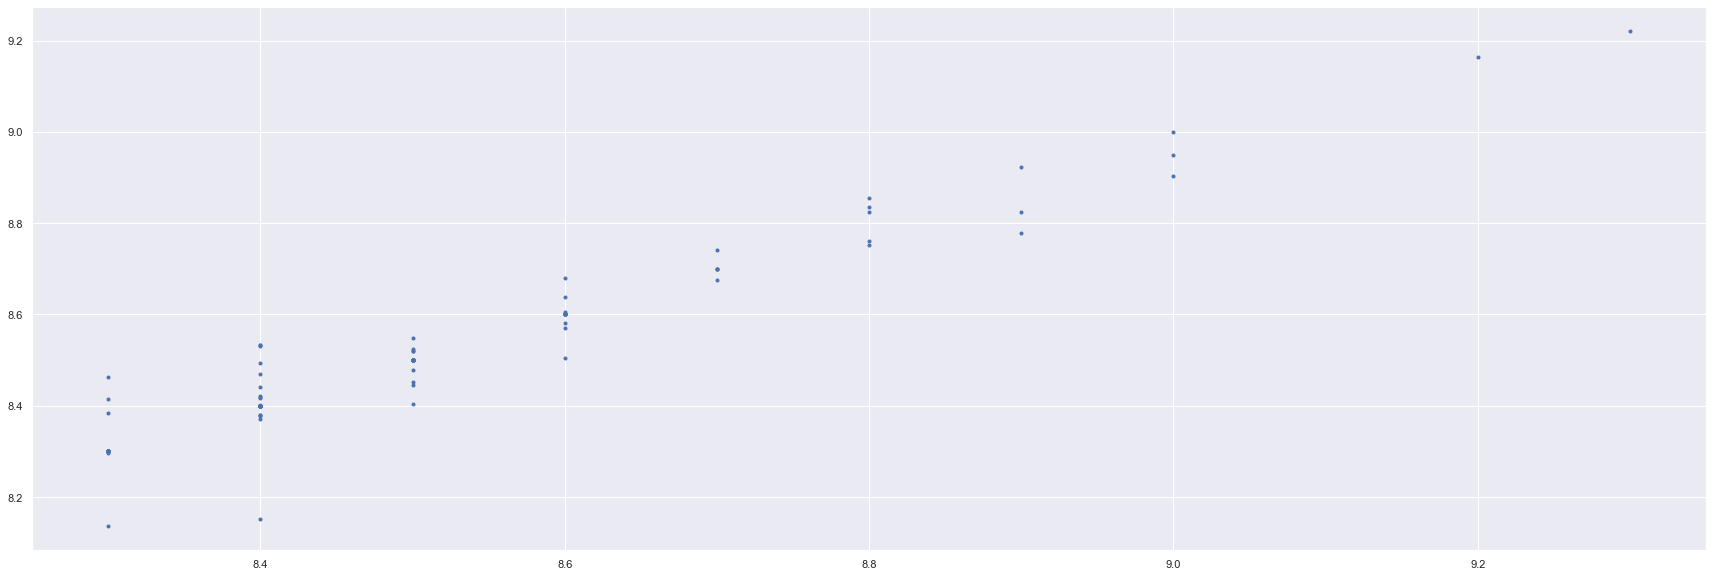

In [29]:
plt.plot(y, modeleReg.predict(X),'.')
plt.show()

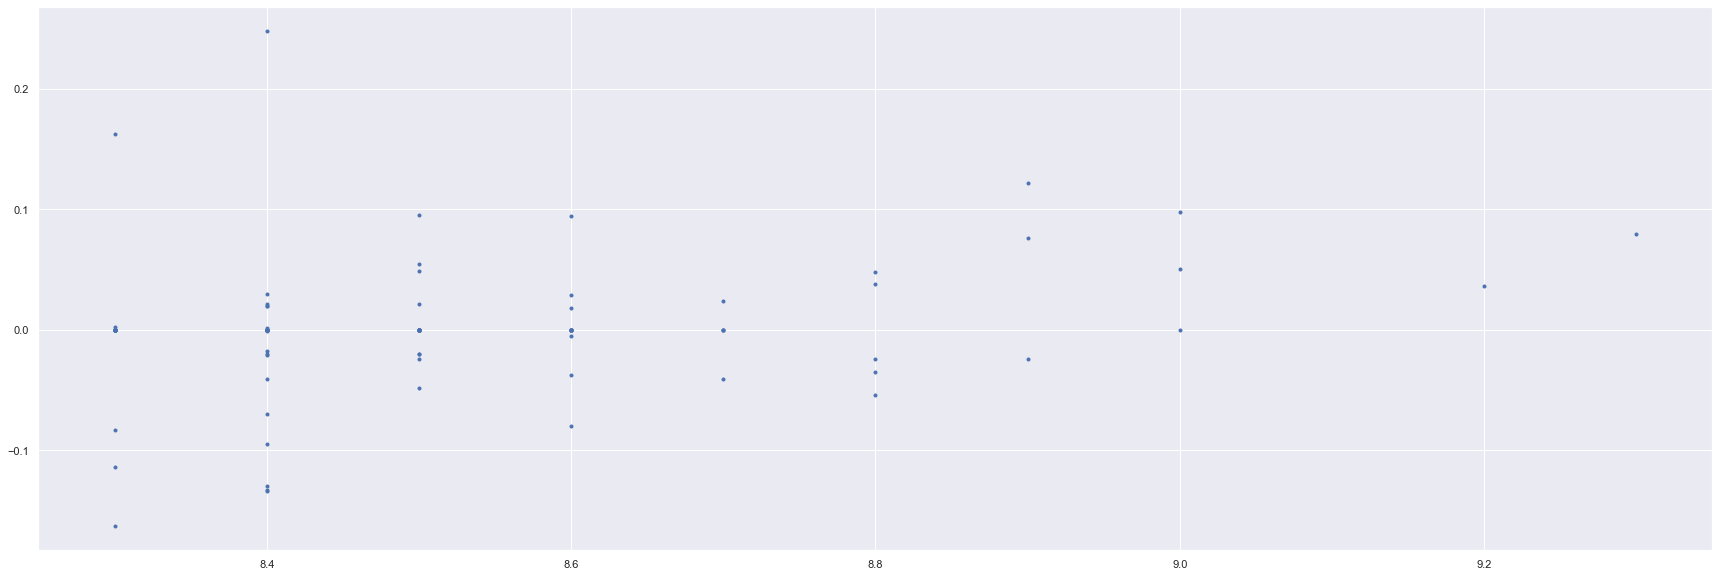

In [30]:
plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
def prepare_machine(df):
    df = pd.get_dummies(data=df, columns=['director1', 'genre1'])
    scaler = MinMaxScaler()
    keepCols = ['votes']
    scaled_df = scaler.fit_transform(df[keepCols])
    scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
    df['votes'] = scaled_df
    df = df.drop(['genre2', 'genre3', 'nb_genres', 'released_year',
                  'director2', 'director3', 'nb_directors', 'gross(M$)'], axis=1)
    return df

In [33]:
def create_model(df):
    df = prepare_machine(df)
    df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
    
    cut = round(len(df)*0.995)
    train = df
    #train = df.iloc[:cut,:]
    #test = df[50:59]
    test = df.iloc[cut:,:]
    
    y = train['grade']
    X = train.drop(['titles','grade'],axis = 1)
      
    model=LinearRegression()
    model.fit(X,y)
    Rcarre = model.score(X,y)
    
    y = test['grade']
    nom = test['titles'].iloc[0]
    X = test.drop(['titles','grade'],axis = 1)
      
    prediction = model.predict(X)
    
    #RMSE=np.sqrt(((y-prediction)**2).sum()/len(y))
    rmse = mean_squared_error(prediction,y)**(1/2)
    return print(f"""
    Pour le film : {nom}, valeur attendue : {y.iloc[0]}, la prédiction est de {round(prediction[0],1)}
    R2 = {Rcarre}
    rmse = {rmse}
    """)

In [34]:
create_model(df1)


    Pour le film : Rang De Basanti, valeur attendue : 8.1, la prédiction est de 8.1
    R2 = 0.8400983157295092
    rmse = 0.00026855468749964473
    
